# Part A: Calculating Loyalty Points

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = '/content/mydata.xlsx'
excel_file = pd.ExcelFile(file_path)
sheet_names = excel_file.sheet_names
print("Available sheets:", sheet_names)


Available sheets: ['User Gameplay data', 'Deposit Data', 'Withdrawal Data']


### Load Sheets into DataFrames

In [11]:
user_gameplay_data = pd.read_excel(file_path, sheet_name='User Gameplay data')
deposit_data = pd.read_excel(file_path, sheet_name='Deposit Data')
withdrawal_data = pd.read_excel(file_path, sheet_name='Withdrawal Data')


### Inspecting the data

In [12]:
print("User Gameplay Data Preview:")
print(user_gameplay_data.head())

print("\nDeposit Data Preview:")
print(deposit_data.head())

print("\nWithdrawal Data Preview:")
print(withdrawal_data.head())


User Gameplay Data Preview:
   User ID  Games Played             Datetime
0      851             1  2022-01-10 00:00:00
1      717             1  2022-01-10 00:00:00
2      456             1  2022-01-10 00:00:00
3      424             1  2022-01-10 00:00:00
4      845             1  2022-01-10 00:00:00

Deposit Data Preview:
   User ID             Datetime  Amount
0      357  2022-01-10 00:03:00    2000
1      776  2022-01-10 00:03:00    2500
2      492  2022-01-10 00:06:00    5000
3      803  2022-01-10 00:07:00    5000
4      875  2022-01-10 00:09:00    1500

Withdrawal Data Preview:
   User ID             Datetime  Amount
0      190  2022-01-10 00:03:00    5872
1      159  2022-01-10 00:16:00    9540
2      164  2022-01-10 00:24:00     815
3      946  2022-01-10 00:29:00   23000
4      763  2022-01-10 00:40:00    9473


# Data Preprocessing

In [13]:
user_gameplay_data['Datetime'] = pd.to_datetime(user_gameplay_data['Datetime'])
deposit_data['Datetime'] = pd.to_datetime(deposit_data['Datetime'])
withdrawal_data['Datetime'] = pd.to_datetime(withdrawal_data['Datetime'])


### Calculate Loyalty Points per Slot


In [14]:
def calculate_loyalty_points(data, date, slot):
    if slot == 'S1':
        slot_start = pd.Timestamp(date + " 00:00:00")
        slot_end = pd.Timestamp(date + " 12:00:00")
    elif slot == 'S2':
        slot_start = pd.Timestamp(date + " 12:00:00")
        slot_end = pd.Timestamp(date + " 23:59:59")

    slot_data = data[(data['Datetime'] >= slot_start) & (data['Datetime'] <= slot_end)]
    points = slot_data.groupby('User ID')['Games Played'].sum()
    return points


### Calculate Points for Specific Slots:



In [15]:
dates_slots = [
    ('2022-10-02', 'S1'),
    ('2022-10-16', 'S2'),
    ('2022-10-18', 'S1'),
    ('2022-10-26', 'S2')
]
loyalty_points_data = []
for date, slot in dates_slots:
    points = calculate_loyalty_points(user_gameplay_data, date, slot)
    points_df = pd.DataFrame(points).reset_index()
    points_df.columns = ['User ID', 'Loyalty Points']
    points_df['Date'] = date
    points_df['Slot'] = slot
    loyalty_points_data.append(points_df)

loyalty_points_data = pd.concat(loyalty_points_data)
print("Loyalty Points Data for Specific Slots:")
print(loyalty_points_data)


Loyalty Points Data for Specific Slots:
     User ID  Loyalty Points        Date Slot
0          2               2  2022-10-16   S2
1          5               9  2022-10-16   S2
2          6               1  2022-10-16   S2
3          8               5  2022-10-16   S2
4          9              51  2022-10-16   S2
..       ...             ...         ...  ...
548      992              44  2022-10-26   S2
549      995               1  2022-10-26   S2
550      996               4  2022-10-26   S2
551      997               2  2022-10-26   S2
552      999               1  2022-10-26   S2

[1615 rows x 4 columns]


### Visualize Loyalty Points by Date and Slot:



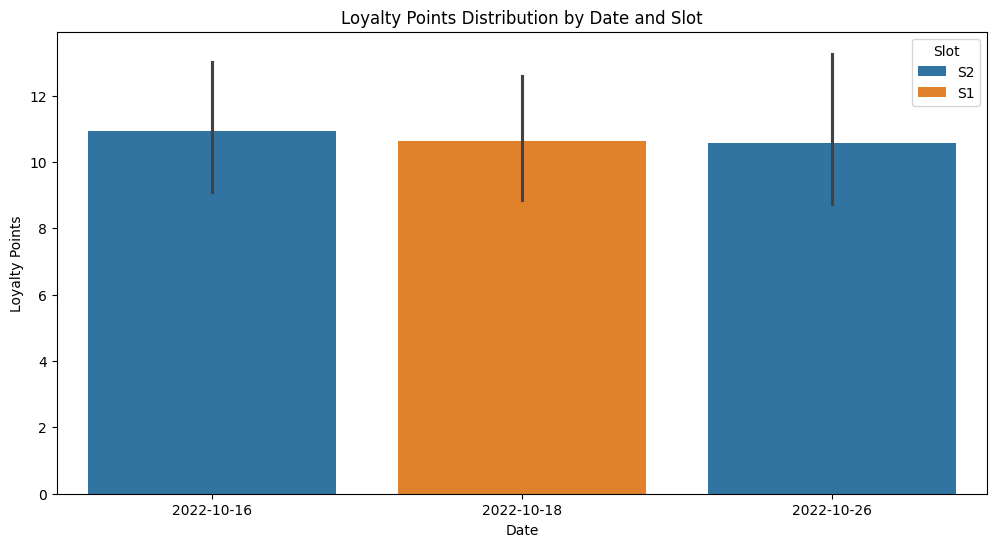

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(data=loyalty_points_data, x='Date', y='Loyalty Points', hue='Slot')
plt.title('Loyalty Points Distribution by Date and Slot')
plt.xlabel('Date')
plt.ylabel('Loyalty Points')
plt.legend(title='Slot')
plt.show()


### Calculate Overall Loyalty Points for October


In [17]:
october_data = user_gameplay_data[user_gameplay_data['Datetime'].dt.month == 10]
overall_points = october_data.groupby('User ID')['Games Played'].sum().reset_index()
overall_points.columns = ['User ID', 'Total Loyalty Points']

total_games = october_data.groupby('User ID')['Games Played'].count().reset_index()
total_games.columns = ['User ID', 'Games Played Count']

rank_data = overall_points.merge(total_games, on='User ID')
rank_data = rank_data.sort_values(by=['Total Loyalty Points', 'Games Played Count'], ascending=[False, False])
rank_data['Rank'] = range(1, len(rank_data) + 1)
print("Ranked Players Based on Loyalty Points:")
print(rank_data.head())


Ranked Players Based on Loyalty Points:
     User ID  Total Loyalty Points  Games Played Count  Rank
748      765                 15557               15556     1
606      618                  4531                4531     2
239      247                  4334                4334     3
651      663                  4171                4171     4
437      449                  4123                4123     5


### Top 20 Players Visualization:



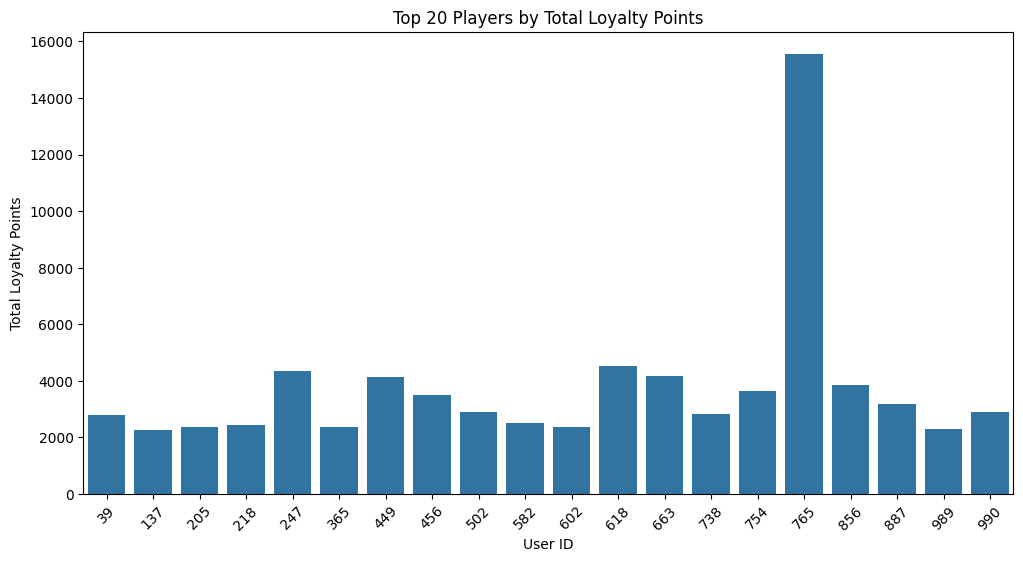

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(data=rank_data.head(20), x='User ID', y='Total Loyalty Points')
plt.title('Top 20 Players by Total Loyalty Points')
plt.xlabel('User ID')
plt.ylabel('Total Loyalty Points')
plt.xticks(rotation=45)
plt.show()


### Average Calculations
#### 1. Calculate Average Deposits and Games Played

In [19]:
avg_deposit = deposit_data['Amount'].mean()
avg_deposit_per_user = deposit_data.groupby('User ID')['Amount'].mean().mean()
avg_games_per_user = user_gameplay_data.groupby('User ID')['Games Played'].mean().mean()

print("Average Deposit Amount:", avg_deposit)
print("Average Deposit per User:", avg_deposit_per_user)
print("Average Games Played per User:", avg_games_per_user)


Average Deposit Amount: 5492.185399701801
Average Deposit per User: 6900.275174462218
Average Games Played per User: 1.000000041500664


# Part B: Bonus Allocation for Top 50 Players

#### Calculate Bonus for Top 50 Players

In [20]:
top_50 = rank_data.head(50)
total_points = top_50['Total Loyalty Points'].sum()
top_50['Bonus'] = (top_50['Total Loyalty Points'] / total_points) * 50000
print("Top 50 Players with Bonus Allocation:")
print(top_50[['User ID', 'Total Loyalty Points', 'Bonus']])

Top 50 Players with Bonus Allocation:
     User ID  Total Loyalty Points        Bonus
748      765                 15557  6386.498736
606      618                  4531  1860.077507
239      247                  4334  1779.204572
651      663                  4171  1712.289402
437      449                  4123  1692.584321
836      856                  3869  1588.311603
738      754                  3633  1491.428290
444      456                  3492  1433.544616
865      887                  3194  1311.208907
964      990                  2893  1187.641630
490      502                  2889  1185.999540
722      738                  2828  1160.957667
38        39                  2781  1141.663109
570      582                  2498  1025.485238
210      218                  2448  1004.959112
590      602                  2384   978.685671
198      205                  2368   972.117311
354      365                  2368   972.117311
963      989                  2303   945.433348
13

<ipython-input-20-9f80243fb4da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_50['Bonus'] = (top_50['Total Loyalty Points'] / total_points) * 50000


### Top 20 Bonus Allocation Visualization:



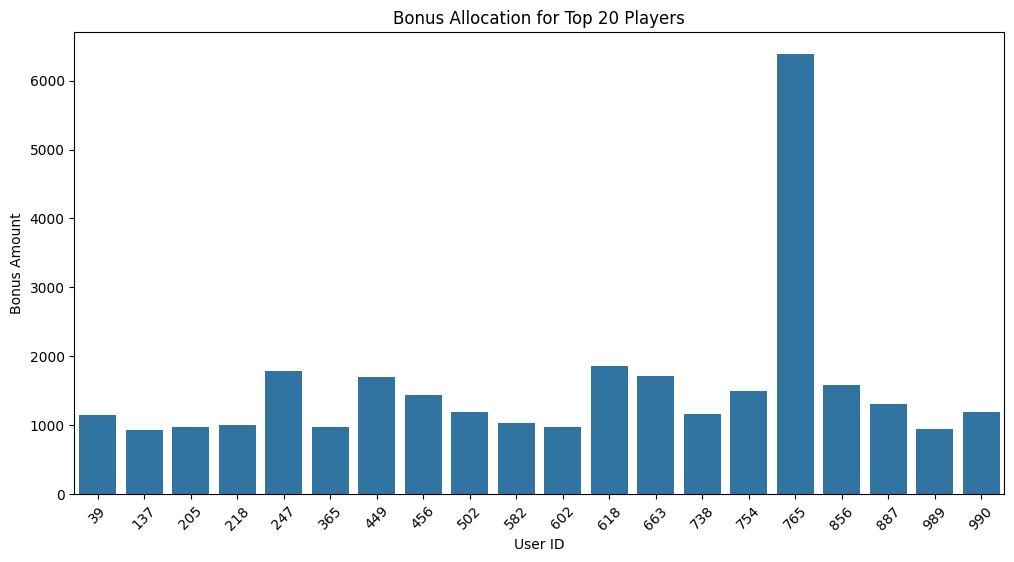

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_50.head(20), x='User ID', y='Bonus')
plt.title('Bonus Allocation for Top 20 Players')
plt.xlabel('User ID')
plt.ylabel('Bonus Amount')
plt.xticks(rotation=45)
plt.show()


# Insights and suggested improvements

## **Fairness of Loyalty Point Calculation:**

The current loyalty point system rewards users mostly for their game frequency. This could disproportionately advantage users who play a lot of short games compared to longer or higher-stakes games.


## **Suggested enhancements:**

**Involvement-Based Scoring:** To properly depict overall player involvement, consider including criteria like as total wagering or session time.

**Implement the declining returns model.**
This would distribute fewer points if a user played too many games in a short period of time, preventing high-frequency players from amassing points excessively.